In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os
import sys
import random
import Levenshtein as Lev
from scipy.special import softmax
import seaborn as sns
sys.path.append('../../')
from common.plot_style_utils import set_pub_plot_context
np.random.seed(42)
random.seed(42)
%matplotlib inline


In [2]:
# Boyden SomArchon https://www.addgene.org/126941/ NOT IN ADDGENE AT TIME
plasmid = """CCTGCAGGCAGCTGCGCGCTCGCTCGCTCACTGAGGCCGCCCGGGCGTCGGGCGACCTTTGGTCGCCCGG
CCTCAGTGAGCGAGCGAGCGCGCAGAGAGGGAGTGGCCAACTCCATCACTAGGGGTTCCTGCGGCCGCAC
GCGTTGCAAAGATGGATAAAGTTTTAAACAGAGAGGAATCTTTGCAGCTAATGGACCTTCTAGGTCTTGA
AAGGAGTGGGAATTGGCTCCGGTGCCCGTCAGTGGGCAGAGCGCACATCGCCCACAGTCCCCGAGAAGTT
GGGGGGAGGGGTCGGCAGCAAATGGTTAATTAATCTAGACTGCAGAGGGCCCTGCGTATGAGTGCAAGTG
GGTTTTAGGACCAGGATGAGGCGGGGTGGGGGTGCCTACCTGACGACCGACCCCGACCCACTGGACAAGC
ACCCAACCCCCATTCCCCAAATTGCGCATCCCCTATCAGAGAGGGGGAGGGGAAACAGGATGCGGCGAGG
CGCGTGCGCACTGCCAGCTTCAGCACCGCGGACAGTGCCTTCGCCCCCGCCTGGCGGCGCGCGCCACCGC
CGCCTCAGCACTGAAGGCGCGCTGACGTCACTCGCCGGTCCCCCGCAAACTCCCCTTCCCGGCCACCTTG
GTCGCGTCCGCGCCGCCGCCGGCCCAGCCGGACCGCACCACGCGAGGCGCGAGATAGGGGGGCACGGGCG
CGACCATCTGCGCTGCGGCGCCGGCGACTCAGCGCTGCCTCAGTCTGCGGTGGGCAGCGGAGGAGTCGTG
TCGTGCCTGAGAGCGCAGTCGAGAGGATCCGCCACCATGGTTTCTATCGCACTGCAGGCTGGTTATGACC
TCCTCGGAGATGGTAGACCTGAAAGTCTGTGGCTCGGAATTGGTACACTGCTGATGCTGATCGGAACCTT
CTACTTCCTGGTTAGAGCGTGGGGAGAGACTGACAAGGATGCACGGGAGTACTACGCAGTGACAATCCTG
GTCAGCGGTATTGCCAGTGCAGCTTATCTGTCAATGTTCTTTGGTATTGGCCTCACAGAGGTGCCAGTAG
GTGGAGAGATGCTGAACATCTACTACGCAAGATACGCACAGTGGCTGTTCACTACACCACTGTTGCTGCT
GCACCTGGCACTCCTGGCCAAAGTTGATAGAGTGACCATCGGCACTCTCGTTGGCGTCGATGCTCTGATG
ATTGTCACAGGCCTGATAGGAACACTGTCACATACTGCCATTGCCAGATACTCTTGGTGGCTGTTCTCAA
CTATCTGTATGATCGTCGTTCTGTATGTCCTGGCCACTTCTCTGCGGTCAGCCGCTAAGGAGAGAGGCCC
AGAGGTTGCCTCAACCTTCAACATCCTCACCGCACTGGTTCTGGTCCTGTGGACTGCTTACCCTATCATC
TGGATTATCGGCACCGAGGGTGCCGGAGTTGTGGGCCTGGGAATCGAAACTTTGCTGTTCATGGTGCTGG
ACGTCACCGCCAAGGTGGGCTTCGGTTTTATCCTGCTCAGGTCAAGAGCCATTCTGCAAGATACAGAAGC
ACCTGAACCTTCAGCTGGAGCTGATACCGGTGCCGCCGACCGCCCGGTAGTAGCAGTGAGCAAGGCGGCC
GCCAAGAGCAGGATCACCAGCGAGGGCGAGTACATCCCCCTGGACCAGATCGACATCAACGTGGTGAGCA
AGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAA
GTTCAGCGTGTCCGGCGAGGGCGAGGGCGATGCCACCTACGGCAAGCTGACCCTGAAGTTCATTTGCACC
ACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGACCTACGGCGTGCAGTGCTTCAGCC
GCTACCCCGACCACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCG
CACCATCTTCTTCAAGGACGACGGCAACTACAAGACCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTG
GTGAACCGCATCGAGCTGAAGGGCATCGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGT
ACAACTACAACAGCCACAACGTCTATATCATGGCCGACAAGCAGAAGAACGGCATCAAGGTGAACTTCAA
GATCCGCCACAACATCGAGGACGGCAGCGTGCAGCTCGCCGACCACTACCAGCAGAACACCCCCATCGGC
GACGGCCCCGTGCTGCTGCCCGACAACCACTACCTGAGCACCCAGTCCGCCCTGAGCAAAGACCCCAACG
AGAAGCGCGATCACATGGTCCTGCTGGAGTTCGTGACCGCCGCCGGGATCACTCTCGGCATGGACGAGCT
GTACAAGGGTGGGAGCGGAGGTACCCAGAGCCAGCCTATCCTGAACACCAAGGAGATGGCCCCTCAGAGC
AAGCCTCCTGAGGAGCTGGAGATGAGCAGCATGCCTAGCCCTGTGGCCCCTCTGCCTGCCAGGACCGAGG
GCGTGATCGACATGAGGAGCATGAGCAGCATCGACAGCTTCATCAGCTGCGCCACCGACTTCCCTGAGGC
CACCAGGTTCTACAAGTTCTGCTACGAGAACGAGGTGTAAGAATTCGATATCAAGCTTATCGATAATCAA
CCTCTGGATTACAAAATTTGTGAAAGATTGACTGGTATTCTTAACTATGTTGCTCCTTTTACGCTATGTG
GATACGCTGCTTTAATGCCTTTGTATCATGCTATTGCTTCCCGTATGGCTTTCATTTTCTCCTCCTTGTA
TAAATCCTGGTTGCTGTCTCTTTATGAGGAGTTGTGGCCCGTTGTCAGGCAACGTGGCGTGGTGTGCACT
GTGTTTGCTGACGCAACCCCCACTGGTTGGGGCATTGCCACCACCTGTCAGCTCCTTTCCGGGACTTTCG
CTTTCCCCCTCCCTATTGCCACGGCGGAACTCATCGCCGCCTGCCTTGCCCGCTGCTGGACAGGGGCTCG
GCTGTTGGGCACTGACAATTCCGTGGTGTTGTCGGGGAAATCATCGTCCTTTCCTTGGCTGCTCGCCTAT
GTTGCCACCTGGATTCTGCGCGGGACGTCCTTCTGCTACGTCCCTTCGGCCCTCAATCCAGCGGACCTTC
CTTCCCGCGGCCTGCTGCCGGCTCTGCGGCCTCTTCCGCGTCTTCGCCTTCGCCCTCAGACGAGTCGGAT
CTCCCTTTGGGCCGCCTCCCCGCATCGATACCGGCTCGAGACGGGTGGCATCCCTGTGACCCCTCCCCAG
TGCCTCTCCTGGCCCTGGAAGTTGCCACTCCAGTGCCCACCAGCCTTGTCCTAATAAAATTAAGTTGCAT
CATTTTGTCTGACTAGGTGTCCTTCTATAATATTATGGGGTGGAGGGGGGTGGTATGGAGCAAGGGGCAA
GTTGGGAAGACAACCTGTAGGGCCTGCGGGGTCTATTGGGAACCAAGCTGGAGTGCAGTGGCACAATCTT
GGCTCACTGCAATCTCCGCCTCCTGGGTTCAAGCGATTCTCCTGCCTCAGCCTCCCGAGTTGTTGGGATT
CCAGGCATGCATGACCAGGCTCAGCTAATTTTTGTTTTTTTGGTAGAGACGGGGTTTCACCATATTGGCC
AGGCTGGTCTCCAACTCCTAATCTCAGGTGATCTACCCACCTTGGCCTCCCAAATTGCTGGGATTACAGG
CGTGAACCACTGCTCCCTTCCCTGTCCTTCTCGAGCTGATTTTGTAGGTAACCACGTGCGGACCGAGCGG
CCGCAGGAACCCCTAGTGATGGAGTTGGCCACTCCCTCTCTGCGCGCTCGCTCGCTCACTGAGGCCGGGC
GACCAAAGGTCGCCCGACGCCCGGGCTTTGCCCGGGCGGCCTCAGTGAGCGAGCGAGCGCGCAGCTGCCT
GCAGGGGCGCCTGATGCGGTATTTTCTCCTTACGCATCTGTGCGGTATTTCACACCGCATACGTCAAAGC
AACCATAGTACGCGCCCTGTAGCGGCGCATTAAGCGCGGCGGGTGTGGTGGTTACGCGCAGCGTGACCGC
TACACTTGCCAGCGCCTTAGCGCCCGCTCCTTTCGCTTTCTTCCCTTCCTTTCTCGCCACGTTCGCCGGC
TTTCCCCGTCAAGCTCTAAATCGGGGGCTCCCTTTAGGGTTCCGATTTAGTGCTTTACGGCACCTCGACC
CCAAAAAACTTGATTTGGGTGATGGTTCACGTAGTGGGCCATCGCCCTGATAGACGGTTTTTCGCCCTTT
GACGTTGGAGTCCACGTTCTTTAATAGTGGACTCTTGTTCCAAACTGGAACAACACTCAACTCTATCTCG
GGCTATTCTTTTGATTTATAAGGGATTTTGCCGATTTCGGTCTATTGGTTAAAAAATGAGCTGATTTAAC
AAAAATTTAACGCGAATTTTAACAAAATATTAACGTTTACAATTTTATGGTGCACTCTCAGTACAATCTG
CTCTGATGCCGCATAGTTAAGCCAGCCCCGACACCCGCCAACACCCGCTGACGCGCCCTGACGGGCTTGT
CTGCTCCCGGCATCCGCTTACAGACAAGCTGTGACCGTCTCCGGGAGCTGCATGTGTCAGAGGTTTTCAC
CGTCATCACCGAAACGCGCGAGACGAAAGGGCCTCGTGATACGCCTATTTTTATAGGTTAATGTCATGAT
AATAATGGTTTCTTAGACGTCAGGTGGCACTTTTCGGGGAAATGTGCGCGGAACCCCTATTTGTTTATTT
TTCTAAATACATTCAAATATGTATCCGCTCATGAGACAATAACCCTGATAAATGCTTCAATAATATTGAA
AAAGGAAGAGTATGAGTATTCAACATTTCCGTGTCGCCCTTATTCCCTTTTTTGCGGCATTTTGCCTTCC
TGTTTTTGCTCACCCAGAAACGCTGGTGAAAGTAAAAGATGCTGAAGATCAGTTGGGTGCACGAGTGGGT
TACATCGAACTGGATCTCAACAGCGGTAAGATCCTTGAGAGTTTTCGCCCCGAAGAACGTTTTCCAATGA
TGAGCACTTTTAAAGTTCTGCTATGTGGCGCGGTATTATCCCGTATTGACGCCGGGCAAGAGCAACTCGG
TCGCCGCATACACTATTCTCAGAATGACTTGGTTGAGTACTCACCAGTCACAGAAAAGCATCTTACGGAT
GGCATGACAGTAAGAGAATTATGCAGTGCTGCCATAACCATGAGTGATAACACTGCGGCCAACTTACTTC
TGACAACGATCGGAGGACCGAAGGAGCTAACCGCTTTTTTGCACAACATGGGGGATCATGTAACTCGCCT
TGATCGTTGGGAACCGGAGCTGAATGAAGCCATACCAAACGACGAGCGTGACACCACGATGCCTGTAGCA
ATGGCAACAACGTTGCGCAAACTATTAACTGGCGAACTACTTACTCTAGCTTCCCGGCAACAATTAATAG
ACTGGATGGAGGCGGATAAAGTTGCAGGACCACTTCTGCGCTCGGCCCTTCCGGCTGGCTGGTTTATTGC
TGATAAATCTGGAGCCGGTGAGCGTGGGTCTCGCGGTATCATTGCAGCACTGGGGCCAGATGGTAAGCCC
TCCCGTATCGTAGTTATCTACACGACGGGGAGTCAGGCAACTATGGATGAACGAAATAGACAGATCGCTG
AGATAGGTGCCTCACTGATTAAGCATTGGTAACTGTCAGACCAAGTTTACTCATATATACTTTAGATTGA
TTTAAAACTTCATTTTTAATTTAAAAGGATCTAGGTGAAGATCCTTTTTGATAATCTCATGACCAAAATC
CCTTAACGTGAGTTTTCGTTCCACTGAGCGTCAGACCCCGTAGAAAAGATCAAAGGATCTTCTTGAGATC
CTTTTTTTCTGCGCGTAATCTGCTGCTTGCAAACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCC
GGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGTT
CTTCTAGTGTAGCCGTAGTTAGGCCACCACTTCAAGAACTCTGTAGCACCGCCTACATACCTCGCTCTGC
TAATCCTGTTACCAGTGGCTGCTGCCAGTGGCGATAAGTCGTGTCTTACCGGGTTGGACTCAAGACGATA
GTTACCGGATAAGGCGCAGCGGTCGGGCTGAACGGGGGGTTCGTGCACACAGCCCAGCTTGGAGCGAACG
ACCTACACCGAACTGAGATACCTACAGCGTGAGCTATGAGAAAGCGCCACGCTTCCCGAAGGGAGAAAGG
CGGACAGGTATCCGGTAAGCGGCAGGGTCGGAACAGGAGAGCGCACGAGGGAGCTTCCAGGGGGAAACGC
CTGGTATCTTTATAGTCCTGTCGGGTTTCGCCACCTCTGACTTGAGCGTCGATTTTTGTGATGCTCGTCA
GGGGGGCGGAGCCTATGGAAAAACGCCAGCAACGCGGCCTTTTTACGGTTCCTGGCCTTTTGCTGGCCTT
TTGCTCACATGT""".replace('\n', '')

In [3]:
# With temperature scale param 
dellogits = np.load('../../../data/deteRNNt_exploration/SomArchon_scanning_N_logits.npy') / 1.7226
dellogits.shape

(12986, 1314)

In [4]:
delprobs = softmax(dellogits, axis=1)

In [5]:
dellow_to_high = np.argsort(delprobs, axis=1)

In [6]:
dellow_to_high[:,-10:]

array([[1045,  483, 1025, ...,    6, 1313,  288],
       [1045, 1025,  483, ...,    6, 1313,  288],
       [1045, 1025,  483, ...,    6, 1313,  288],
       ...,
       [1045,  483, 1025, ...,    6, 1313,  288],
       [1045,  483, 1025, ...,    6, 1313,  288],
       [1045,  483, 1025, ...,    6, 1313,  288]])

In [7]:
(dellow_to_high[:,-1] == 183).sum()

0

In [8]:
(dellow_to_high[:,-1] == 91).sum()

0

In [9]:
delwindow_info = pickle.load(open('../../../data/deteRNNt_exploration/SomArchon_scanning_N_window_info.pkl', 'rb'))

In [10]:
delwindow_info

,window_start,window_end
0,0,50
1,1,51
2,2,52
3,3,53
4,4,54
5,5,55
6,6,56
7,7,57
8,8,58
9,9,59


In [11]:
3685 - 1024

2661

In [12]:
delwindow_info['size'] = delwindow_info.apply(lambda row: row[1] -row[0], axis=1)

In [13]:
delwindow_info

,window_start,window_end,size
0,0,50,50
1,1,51,50
2,2,52,50
3,3,53,50
4,4,54,50
5,5,55,50
6,6,56,50
7,7,57,50
8,8,58,50
9,9,59,50


In [14]:
delwindow_info['size'].value_counts()

10    6513
50    6473
Name: size, dtype: int64

In [15]:
# Ok, so I have to average the window in order to get something over the linear sequence

window_size = 10
window = delwindow_info[delwindow_info['size'] == window_size]
window_logits = dellogits[window.index.values]

"""
window = window_info
window_logits = logits
"""

delbp_probs = []
delsize_of_average = []
for i in range(len(plasmid)):
    # select all subsequences which include this position
    delbp_logits = window_logits[ (i >= window['window_start']) & (i <= window['window_end'])]
    delsize_of_average.append(len(delbp_logits))
    delbp_probs.append(softmax(np.mean(delbp_logits, axis=0)))

In [16]:
delsize_of_average[0]

1

In [17]:
np.argmax(delbp_probs[100])

288

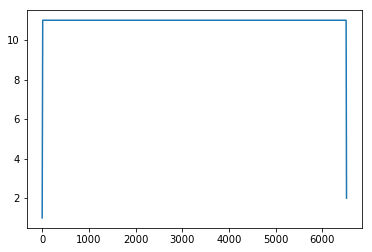

In [18]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(plasmid)), delsize_of_average)

In [19]:
delbp_probs = np.array(delbp_probs)

# This is the final plot.

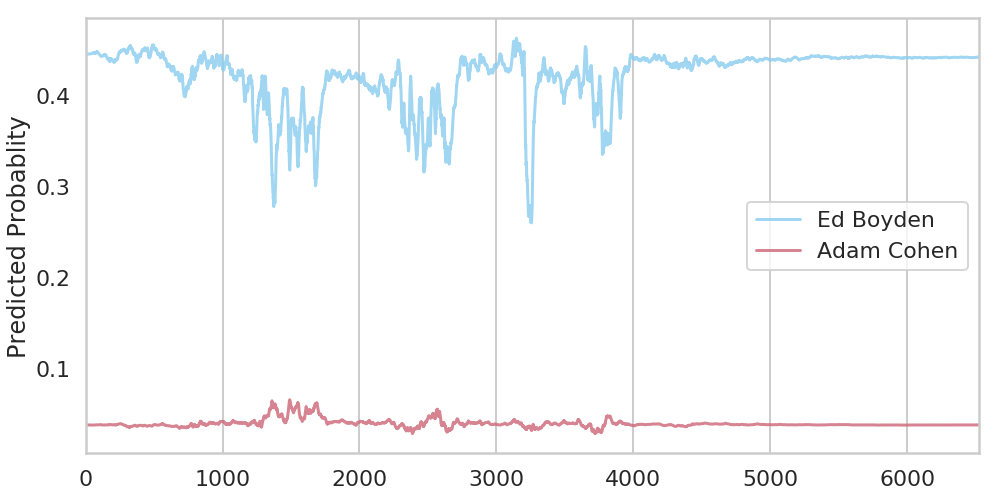

In [20]:
import warnings
warnings.filterwarnings("once")
set_pub_plot_context(context='poster')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))

window_size = 10
window = delwindow_info[delwindow_info['size'] == window_size]
window_logits = dellogits[window.index.values]

delbp_probs = []
delsize_of_average = []
for i in range(len(plasmid)):
    # select all subsequences which include this position
    delbp_logits = window_logits[ (i >= window['window_start']) & (i <= window['window_end'])]
    delsize_of_average.append(len(delbp_logits))
    delbp_probs.append(softmax(np.mean(delbp_logits, axis=0)))


delbp_probs = np.array(delbp_probs)
delboyden = delbp_probs[:,288]
delcohen = delbp_probs[:, 6]
pal = sns.color_palette()
ax.plot(np.arange(len(plasmid)), delboyden, label="Ed Boyden", color=pal[0], alpha=.8)
ax.plot(np.arange(len(plasmid)), delcohen, label="Adam Cohen", color=pal[1], alpha=.8)


ax.set_xlim(0, len(plasmid))
ax.set_ylabel('Predicted Probablity')
ax.yaxis.grid(False)
ax.legend(loc='center right')


In [21]:
print(np.argsort(delboyden)[:200] + 1)

[3257 3254 3258 3253 3256 3255 3259 3239 3237 3240 3260 3238 3235 3241
 3261 3251 3247 3249 3242 3234 3252 3248 3250 3243 3236 3262 3244 1375
 3245 1374 3263 3246 3233 3232 1383 1378 1380 1381 1376 1382 1384 1379
 1377 1373 1371 1372 1385 3231 3230 1370 1369 3264 1368 1367 1386 1387
 3229 1366 1388 1680 1681 1682 3228 1683 1679 1365 3265 3227 1684 3225
 3226 1677 1364 1687 1389 1689 1678 1685 1688 3224 1686 3223 1362 3222
 1363 1675 1676 1674 3266 2472 1390 1673 1492 2471 1491 1690 1361 1490
 2475 1691 1672 2478 1552 2470 2473 1493 3220 2477 1692 2476 1553 3218
 1489 1549 2474 1360 3267 2656 3219 2469 2479 1391 2657 1494 2655 1550
 3221 1359 1551 2654 2632 2658 2653 2652 1548 2659 2480 1554 1693 3217
 1495 2418 2651 1671 1392 1488 2419 2633 2481 1556 1358 2417 2631 2638
 2468 1555 2482 2630 2650 1393 1547 2629 3268 2660 2637 2422 2661 2420
 2634 2649 1557 3776 2483 2421 2628 2484 1357 3780 2416 2423 1694 2647
 1496 2648 2639 1695 2635 1394 3779 1486 1612 1696 2636 3775 2359 1397
 3783 